# 1. Importing Libraries and Datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Creating a path to import dataframe

path = r'/Users/shailioza/Documents/CareerFoundry Projects'

In [4]:
# Importing Dataframe 

df = pd.read_csv(os.path.join(path, 'pollution_clean.csv'))

In [5]:
df.head(5)

,Unnamed: 0,Date,Year,Month,Day,Address,State,County,City,O3 Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [6]:
# Remove column 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
# Removing all categorical variables

df.drop(['Date', 'Year','Month', 'Day', 'Address','County', 'State', 'City'], axis = 1, inplace = True)

In [8]:
df.head(5)

,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


# 2. The elbow technique

In [9]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

[-868907446.9903047,
 -640084890.6683193,
 -466403045.85337317,
 -414108606.48555547,
 -370519979.4736618,
 -338390633.23339236,
 -318206907.2404014,
 -300252561.3972702,
 -285813355.96786267]

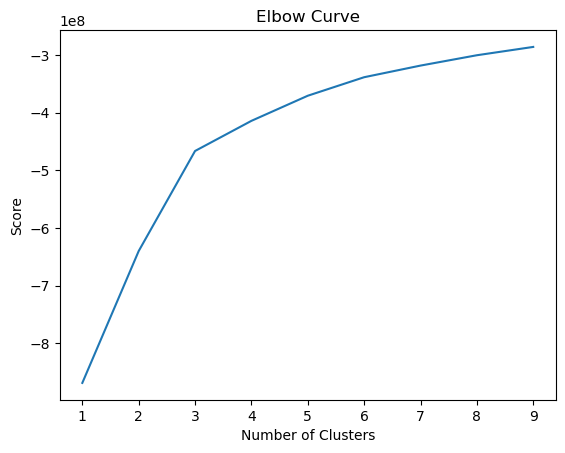

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve begins to flattens out.

# 3. K-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

/Users/shailioza/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df['clusters'].value_counts()

0    348765
2    207979
1     50476
Name: clusters, dtype: int64

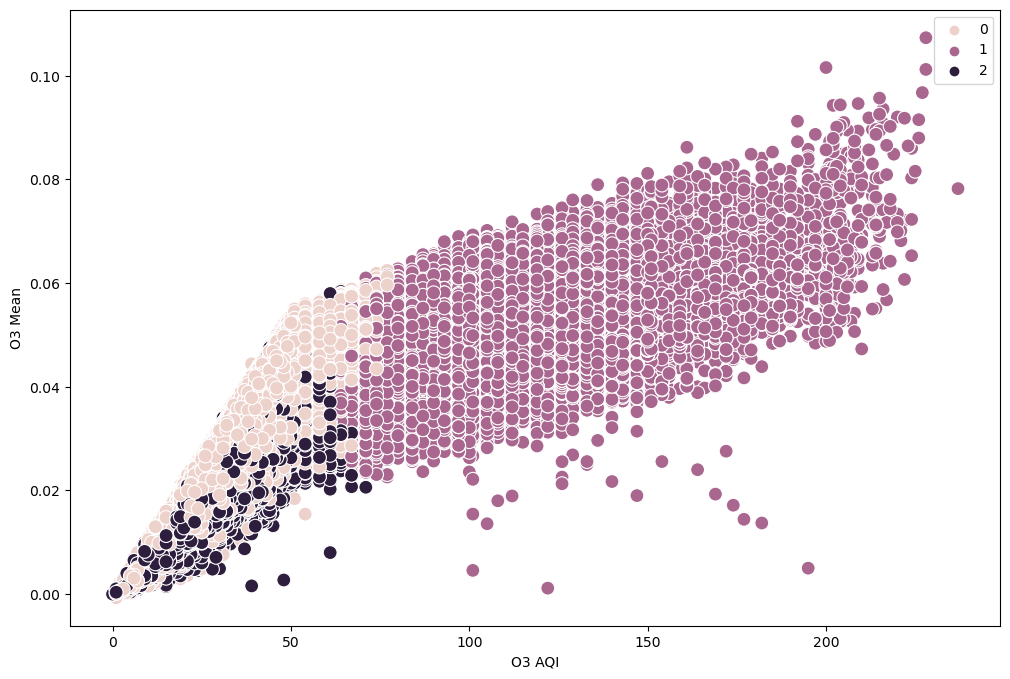

In [18]:
# Plot the clusters for the "O3 Mean" and "O3 AQI" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['O3 AQI'], y = df['O3 Mean'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('O3 AQI')
plt.ylabel('O3 Mean')
plt.show()

#### The cluster (1) suggests positive relationship between O3 AQI and O3 Mean but not too strong as NO2.

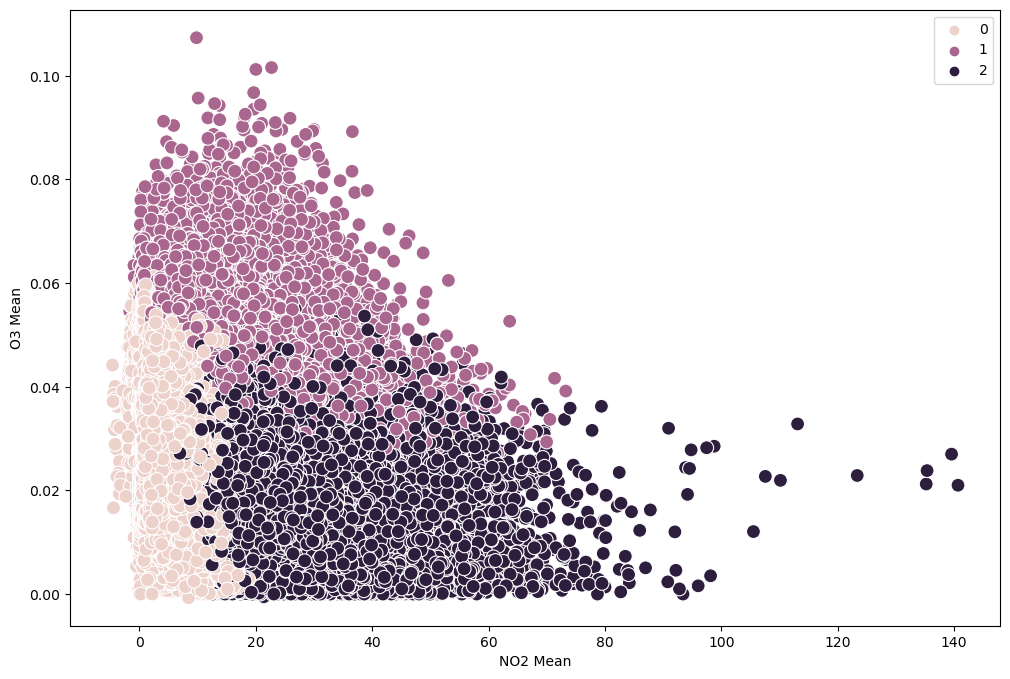

In [19]:
# Plot the clusters for the "O3 Mean" and "NO2 Mean" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['NO2 Mean'], y = df['O3 Mean'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')
plt.show()

##### I can't seem to come to any relevant insights with this graph.

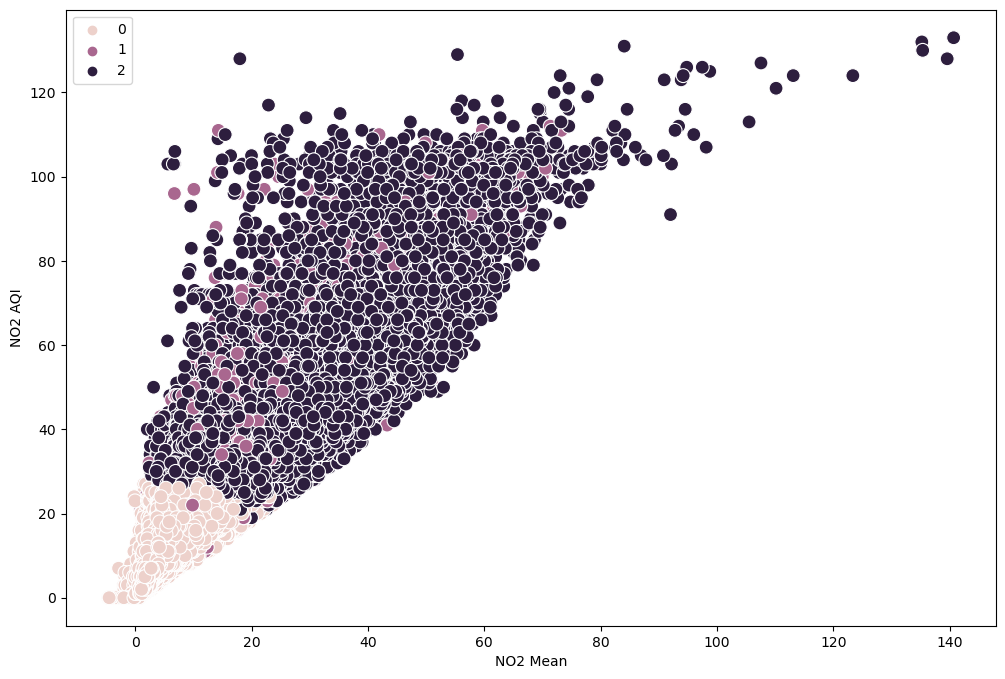

In [20]:
# Plot the clusters for the "NO2 AQI" and "NO2 Mean" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['NO2 Mean'], y = df['NO2 AQI'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('NO2 Mean')
plt.ylabel('NO2 AQI')
plt.show()

##### The cluster 2 suggests that NO2 levels in air are strong contributors to the AQI values. 

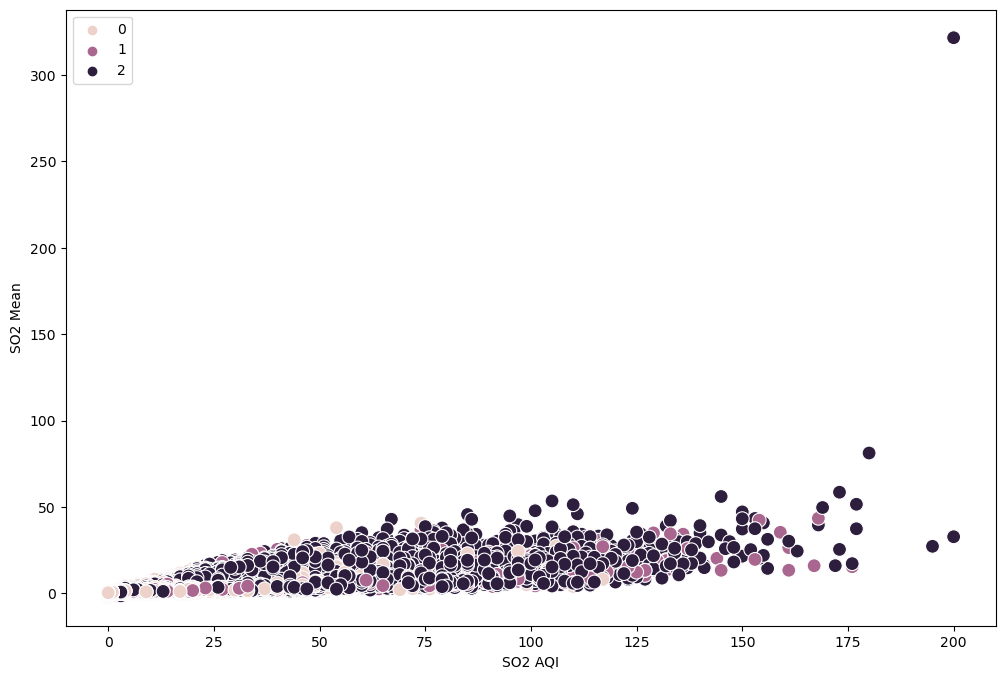

In [22]:
# Plot the clusters for the "SO2 AQI" and "SO2 Mean" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['SO2 AQI'], y = df['SO2 Mean'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('SO2 AQI')
plt.ylabel('SO2 Mean')
plt.show()

##### This graph suggests that SO2 levels in air do not contribute strongly to AQI . Even with low SO2 Mean, the AQI increases independently.

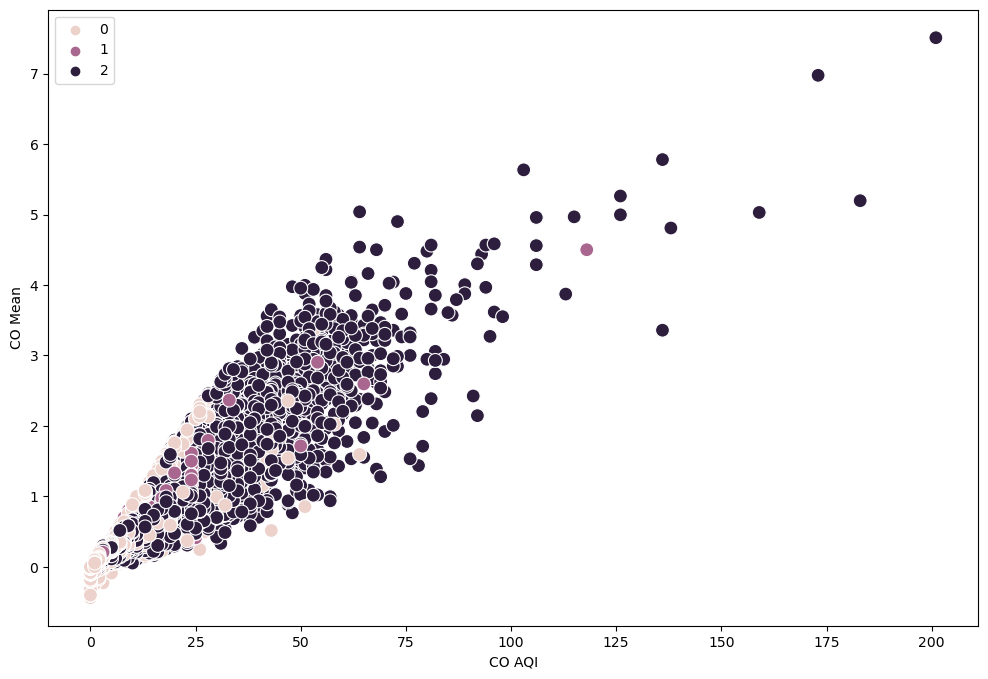

In [23]:
# Plot the clusters for the "CO AQI" and "CO Mean" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['CO AQI'], y = df['CO Mean'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('CO AQI')
plt.ylabel('CO Mean')
plt.show()

# 4. Descriptive Statistics

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df.groupby('cluster').agg({'O3 Mean':['mean', 'median'], 
                         'O3 AQI':['mean', 'median'], 
                         'NO2 Mean':['mean', 'median'],
                          'NO2 AQI':['mean', 'median'],
                          'CO Mean':['mean', 'median'], 
                         'CO AQI':['mean', 'median'], 
                         'SO2 Mean':['mean', 'median'],
                          'SO2 AQI':['mean', 'median']})

O3 Mean               O3 AQI          NO2 Mean             \
                 mean    median       mean median       mean     median   
cluster                                                                   
dark purple  0.021799  0.021176  31.804432   31.0  20.577291  18.826087   
pink         0.029606  0.029765  35.024524   35.0   6.183564   5.770833   
purple       0.048212  0.047882  97.629963   90.0  13.855262  12.472259   

               NO2 AQI          CO Mean              CO AQI         SO2 Mean  \
                  mean median      mean    median      mean median      mean   
cluster                                                                        
dark purple  36.649368   34.0  0.505004  0.416667  8.860505    7.0  2.522701   
pink         12.572810   12.0  0.236833  0.200000  3.308167    3.0  0.815465   
purple       28.543090   27.0  0.343993  0.300000  5.404291    5.0  2.328055   

                        SO2 AQI         
               median      mean median  
cluster                                 
dark purple  1.350000  9.716558    4.0  
pink         0.383333  2.547437    1.0  
purple       1.137500  9.485478    4.0

#### The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on what in fact influences the AQI and where and when.